In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🏏 IPL Exploratory Data Analysis (2008 - 2024)

---

## 📌 Introduction

The **Indian Premier League (IPL)** is the most followed T20 cricket league globally. This EDA explores IPL data from **2008 to 2024**, uncovering trends and patterns in teams, players, and match results.

---

## 📁 Dataset Overview

- **Data Sources**: Kaggle, Official IPL datasets
- **Files Used**:
  - `matches.csv`: Match-level summary
  - `deliveries.csv`: Ball-by-ball detail
- **Time Frame**: IPL Seasons from 2008 to 2024






In [2]:
data = pd.read_csv("..\data\matches.csv")
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
sns.set_style('darkgrid')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
print(data['team1'].unique(),"\n")
print(data['team2'].unique(),"\n")
print(data['toss_winner'].unique(),"\n")
print(data['winner'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru'] 

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru'] 

['Royal Challengers Bangalore' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kochi Tuskers Ke

In [6]:
# 📝 Standardizing Team Names
# The IPL dataset contains inconsistent team names due to rebranding and older franchises.
# This step renames teams for consistency across all seasons.
# Examples:
# - 'Delhi Daredevils' → 'Delhi Capitals'
# - 'Rising Pune Supergiants' and 'Rising Pune Supergiant' → 'Rising Pune Supergiant'
# - 'Kings XI Punjab' → 'Punjab Kings'
# - 'Deccan Chargers' → 'Sunrisers Hyderabad'

new_names = {'Delhi Daredevils':'Delhi Capitals',
             'Kings XI Punjab' :'Punjab Kings',
             'Rising Pune Supergiant':'Rising Pune Supergiants',
             'Royal Challengers Bengaluru':'Royal Challengers Bangalore',
             'Deccan Chargers':'Sunrisers Hyderabad'}

data['team1'] = data['team1'].replace(new_names)
data['team2'] = data['team2'].replace(new_names)
data['toss_winner'] = data['toss_winner'].replace(new_names)
data['winner'] = data['winner'].replace(new_names)

In [7]:
print(data['team1'].unique(),"\n")
print(data['team2'].unique(),"\n")
print(data['toss_winner'].unique(),"\n")
print(data['winner'].unique())

['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Lucknow Super Giants' 'Gujarat Titans'] 

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Gujarat Titans'
 'Lucknow Super Giants'] 

['Royal Challengers Bangalore' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Gujarat Titans' 'Lucknow Super Giants'] 

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bangalore' 'Rajasthan Royals' '

In [8]:
data.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [9]:
data[data['method'] == 'D/L']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Capitals,Punjab Kings,Delhi Capitals,bat,Punjab Kings,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Capitals,Punjab Kings,Delhi Capitals,field,Delhi Capitals,wickets,10.0,54.0,6.0,N,D/L,MR Benson,SD Ranade
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,69.0,9.2,N,D/L,DJ Harper,SD Ranade
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene
192,501215,2011,Kochi,2011-04-18,League,BB McCullum,Nehru Stadium,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,135.0,17.0,N,D/L,K Hariharan,AL Hill
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,52.0,10.0,N,D/L,Asad Rauf,PR Reiffel
231,501255,2011,Bangalore,2011-05-14,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,102.0,13.0,N,D/L,RE Koertzen,RB Tiffin
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,118.0,12.0,N,D/L,RK Illingworth,VA Kulkarni


In [10]:
data['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [11]:
data.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [12]:
data[data['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,Delhi Capitals,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Punjab Kings,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,bat,Delhi Capitals,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


In [13]:
# The 'city' column contains some missing (NaN) values.
# To fill these, I'm using the 'venue' column since it contains the stadium names.
# Based on the venue, I can infer the corresponding city because stadiums are associated with specific cities.
# This helps in maintaining data consistency and avoiding loss of information due to missing values.


data['city'].fillna('Dubai', inplace=True)

C:\Users\bittu\AppData\Local\Temp\ipykernel_6048\4142451788.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['city'].fillna('Dubai', inplace=True)


In [14]:
data.isna().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [15]:
data['result_margin'].value_counts()

result_margin
6.0      131
7.0      130
5.0      109
8.0       85
4.0       74
        ... 
76.0       1
53.0       1
105.0      1
66.0       1
106.0      1
Name: count, Length: 98, dtype: int64

In [16]:
# Fill result_margin with 0 only for matches with no result
data.loc[data['result'] == 'no result', 'result_margin'] = 0
data['result_margin'] = data['result_margin'].fillna(0)

In [17]:
#there are lot of null values in the method column
#D/L is used for rain affected matches only
#therefore we will fill 'regular' for all the other matches

data['method'].fillna('regular',inplace=True)

C:\Users\bittu\AppData\Local\Temp\ipykernel_6048\202993771.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['method'].fillna('regular',inplace=True)


In [18]:
data.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    5
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             5
result             0
result_margin      0
target_runs        3
target_overs       3
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [19]:
data['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

In [20]:
# Standardizing the 'venue' column by removing duplicate city names or extra info.
# Some entries have repeated or extended names like "Wankhede Stadium, Wankhede Stadium, Mumbai".
# Keeping only the stadium name (e.g., "Wankhede Stadium") for consistency and easier grouping/filtering.

venue_cleaning_map = {
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
}

data['venue'].replace(venue_cleaning_map, inplace=True)

C:\Users\bittu\AppData\Local\Temp\ipykernel_6048\4146893529.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['venue'].replace(venue_cleaning_map, inplace=True)


In [21]:
data['venue'].value_counts()

venue
Wankhede Stadium                                                         118
M Chinnaswamy Stadium                                                     94
Eden Gardens                                                              93
MA Chidambaram Stadium                                                    85
Rajiv Gandhi International Stadium                                        77
Punjab Cricket Association IS Bindra Stadium                              61
Feroz Shah Kotla                                                          60
Sawai Mansingh Stadium                                                    47
Dubai International Cricket Stadium                                       46
Dr DY Patil Sports Academy                                                37
Arun Jaitley Stadium                                                      30
Sheikh Zayed Stadium                                                      29
Sharjah Cricket Stadium                                               

In [22]:
data.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    5
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             5
result             0
result_margin      0
target_runs        3
target_overs       3
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [23]:
data[data['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,no result,0.0,NaN,NaN,N,regular,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,regular,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,regular,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,regular,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,regular,AK Chaudhary,NA Patwardhan


In [24]:
data.drop(data[data['player_of_match'].isna()].index, inplace=True)

In [25]:
data.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [26]:
# Loading the delivery dataset which contains ball-by-ball level information for each IPL match.
# This dataset will help in detailed analysis such as player performance, run distribution, and wicket details.
# We'll perform initial checks like shape, column names, and null values to ensure data quality.
# Also, we'll verify that match_id in the delivery data aligns with the matches dataset for accurate merging later.
data1 = pd.read_csv("..\data\deliveries.csv")
data1.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [27]:
data1.shape

(260920, 17)

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [29]:
print(data1['batting_team'].value_counts(), "\n")
print(data1['bowling_team'].value_counts(), "\n")

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64 

bowling_team
Mumbai Indians                 31505
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Royal Challengers Bangalore    28358
Rajasthan Royals               26432
Kings XI Punjab                22483
Sunrisers Hyderabad  

In [30]:
new_names = {'Delhi Daredevils':'Delhi Capitals',
             'Kings XI Punjab' :'Punjab Kings',
             'Rising Pune Supergiant':'Rising Pune Supergiants',
             'Royal Challengers Bengaluru':'Royal Challengers Bangalore',
             'Deccan Chargers':'Sunrisers Hyderabad'}

data1['batting_team'].replace(new_names, inplace=True)
data1['bowling_team'].replace(new_names, inplace=True)

C:\Users\bittu\AppData\Local\Temp\ipykernel_6048\3105972004.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['batting_team'].replace(new_names, inplace=True)
C:\Users\bittu\AppData\Local\Temp\ipykernel_6048\3105972004.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [31]:
print(data1['batting_team'].value_counts(), "\n")
print(data1['bowling_team'].value_counts(), "\n")

batting_team
Mumbai Indians                 31437
Sunrisers Hyderabad            30877
Royal Challengers Bangalore    30023
Delhi Capitals                 29732
Kolkata Knight Riders          29514
Punjab Kings                   29479
Chennai Super Kings            28651
Rajasthan Royals               26242
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiants         3480
Kochi Tuskers Kerala            1582
Name: count, dtype: int64 

bowling_team
Mumbai Indians                 31505
Sunrisers Hyderabad            30756
Royal Challengers Bangalore    30159
Delhi Capitals                 29941
Kolkata Knight Riders          29663
Punjab Kings                   29202
Chennai Super Kings            28576
Rajasthan Royals               26432
Pune Warriors                   5457
Gujarat Titans                  5301
Lucknow Super Giants            5226
Gujarat Lions        

In [32]:
df = data.merge(data, on='id')

In [33]:
len(data1) - len(data)

259830

In [34]:
df.columns

Index(['id', 'season_x', 'city_x', 'date_x', 'match_type_x',
       'player_of_match_x', 'venue_x', 'team1_x', 'team2_x', 'toss_winner_x',
       'toss_decision_x', 'winner_x', 'result_x', 'result_margin_x',
       'target_runs_x', 'target_overs_x', 'super_over_x', 'method_x',
       'umpire1_x', 'umpire2_x', 'season_y', 'city_y', 'date_y',
       'match_type_y', 'player_of_match_y', 'venue_y', 'team1_y', 'team2_y',
       'toss_winner_y', 'toss_decision_y', 'winner_y', 'result_y',
       'result_margin_y', 'target_runs_y', 'target_overs_y', 'super_over_y',
       'method_y', 'umpire1_y', 'umpire2_y'],
      dtype='object')

In [35]:
df.isna().sum()

id                   0
season_x             0
city_x               0
date_x               0
match_type_x         0
player_of_match_x    0
venue_x              0
team1_x              0
team2_x              0
toss_winner_x        0
toss_decision_x      0
winner_x             0
result_x             0
result_margin_x      0
target_runs_x        0
target_overs_x       0
super_over_x         0
method_x             0
umpire1_x            0
umpire2_x            0
season_y             0
city_y               0
date_y               0
match_type_y         0
player_of_match_y    0
venue_y              0
team1_y              0
team2_y              0
toss_winner_y        0
toss_decision_y      0
winner_y             0
result_y             0
result_margin_y      0
target_runs_y        0
target_overs_y       0
super_over_y         0
method_y             0
umpire1_y            0
umpire2_y            0
dtype: int64

<Axes: >

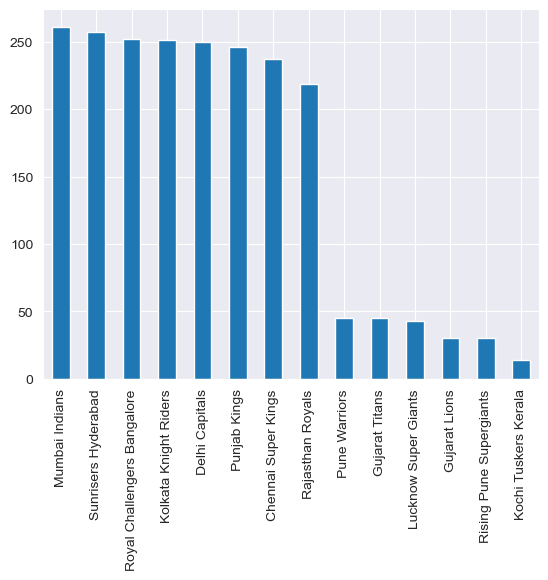

In [36]:
# Total Match Played by each Teams
pd.concat([data['team1'], data['team2']]).value_counts().plot(kind='bar')
### 🏏 Matches Played by Each Team
# From the plot, we observe that **Mumbai Indians** have played the most matches, largely due to consistent playoff qualifications and multiple final appearances.  
# **Chennai Super Kings**, despite being one of the top teams, show slightly fewer matches because of their **two-year suspension (2016 & 2017)** from the IPL.


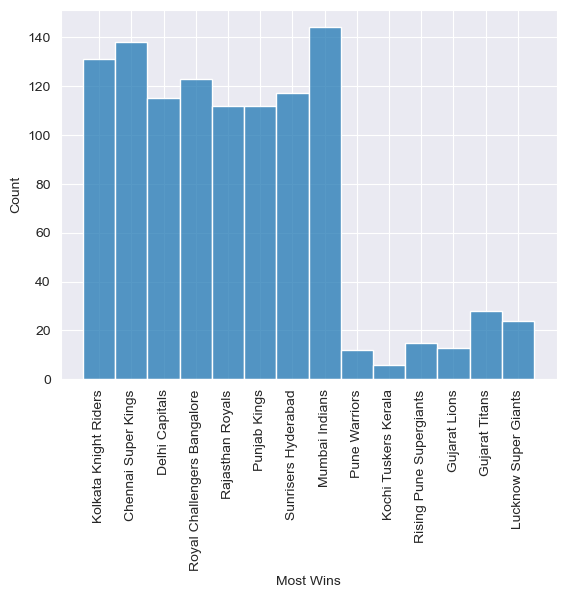

In [37]:
# Most win by Teams

sns.histplot(df['winner_x'])
plt.xticks(rotation=90)
plt.xlabel("Most Wins")
plt.show()

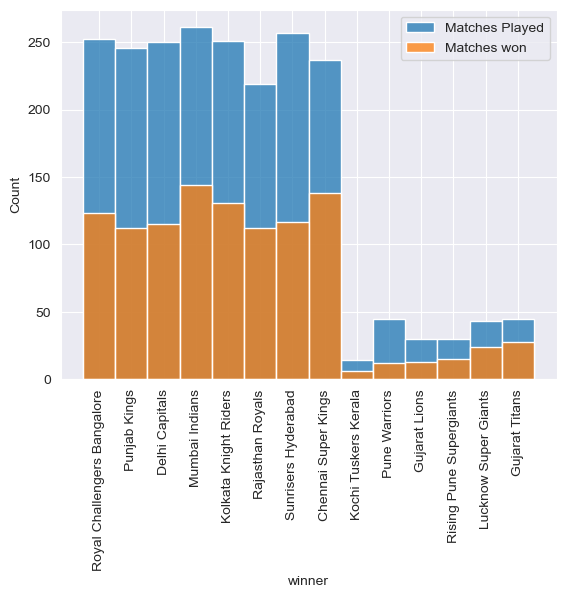

In [38]:
sns.histplot(pd.concat([data['team1'], data['team2']]))
sns.histplot(data['winner'])
plt.xticks(rotation = 90);
plt.legend(["Matches Played", "Matches won"])

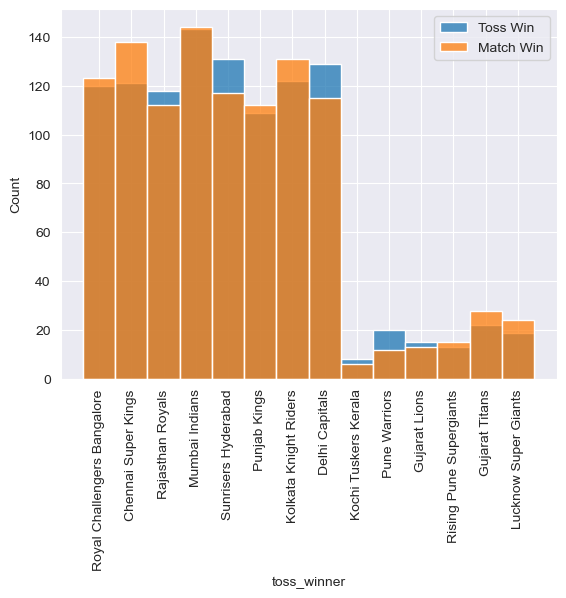

In [39]:
sns.histplot(data['toss_winner'])
sns.histplot(data['winner'])
plt.xticks(rotation = 90);
plt.legend(["Toss Win", "Match Win"])

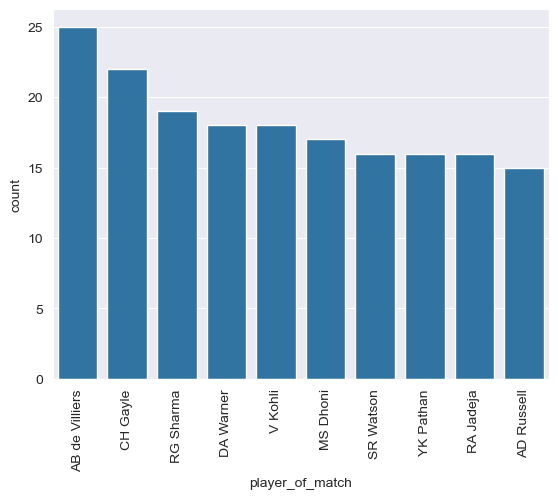

In [40]:
sns.barplot(x = data['player_of_match'].value_counts().head(10).index, y= data['player_of_match'].value_counts().head(10))
plt.xticks(rotation = 90)
plt.show()


In [ ]:
df['year'] = pd.DatetimeIndex(data.date).year
# Creating a new column like year to analyze each team’s performance per year


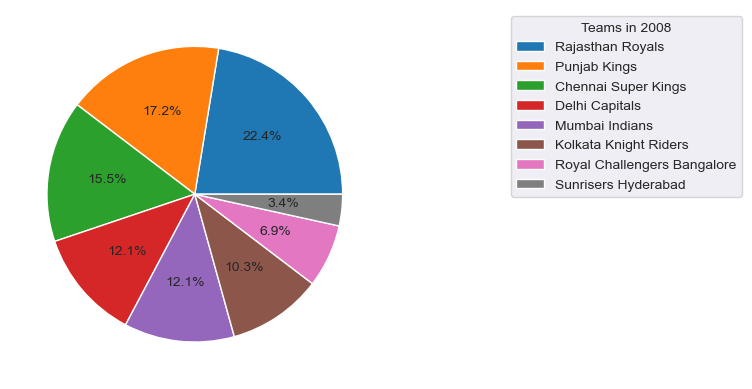

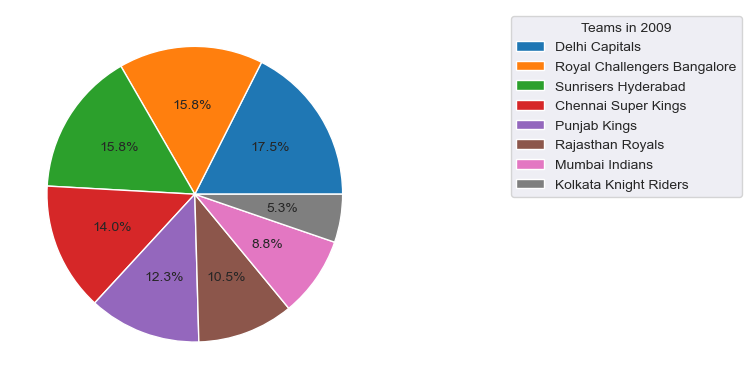

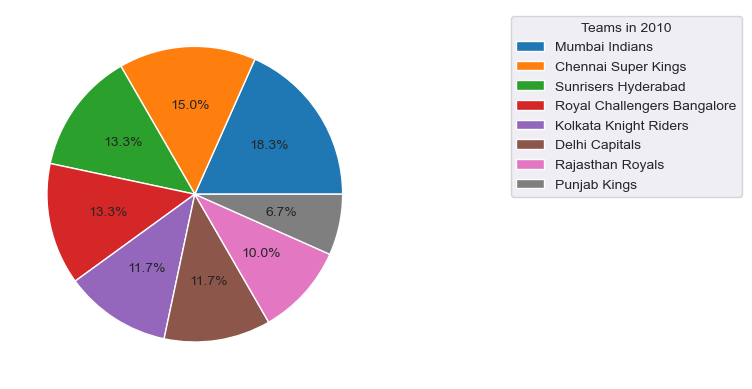

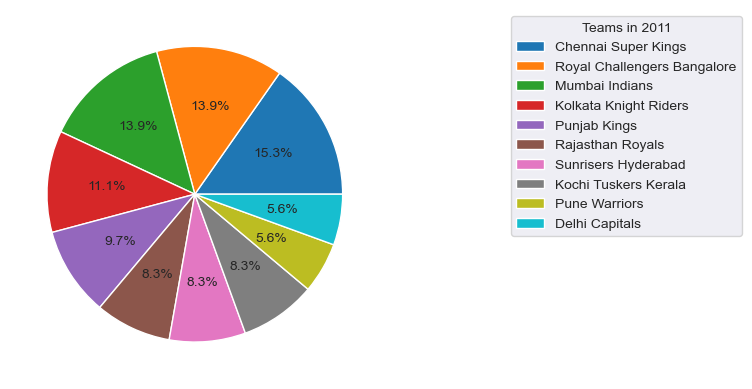

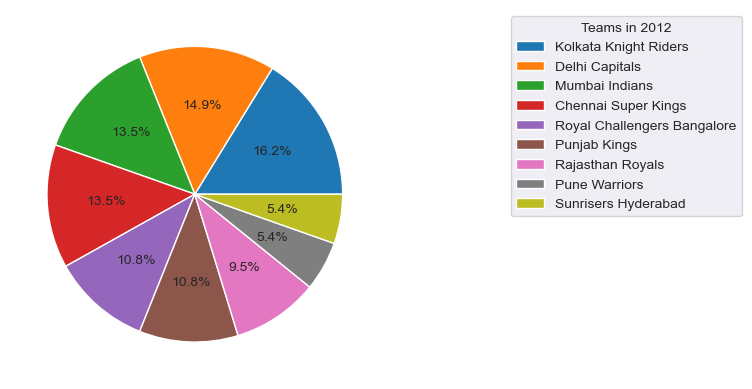

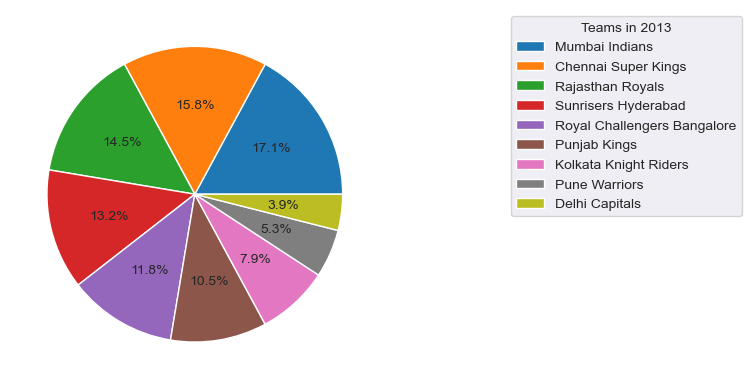

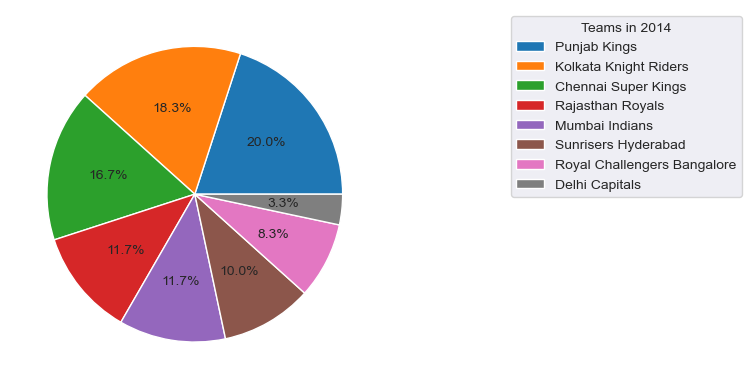

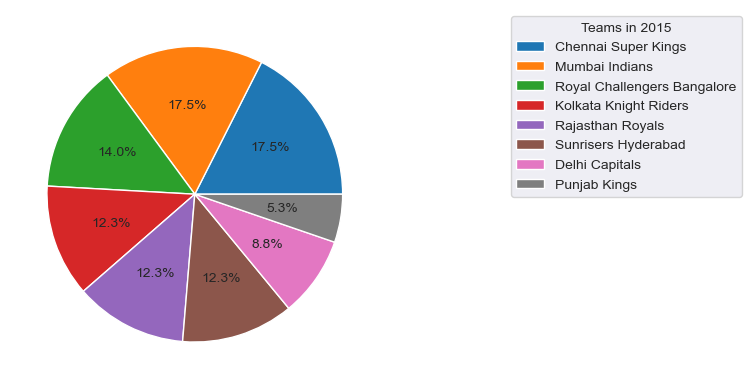

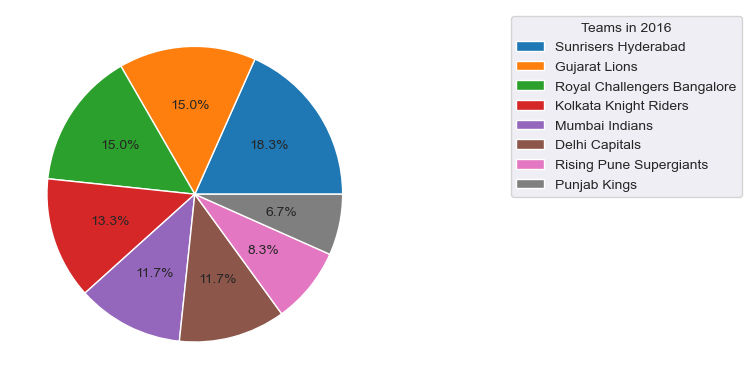

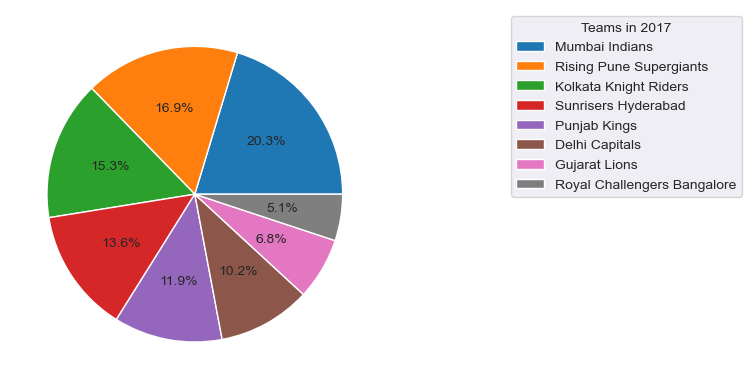

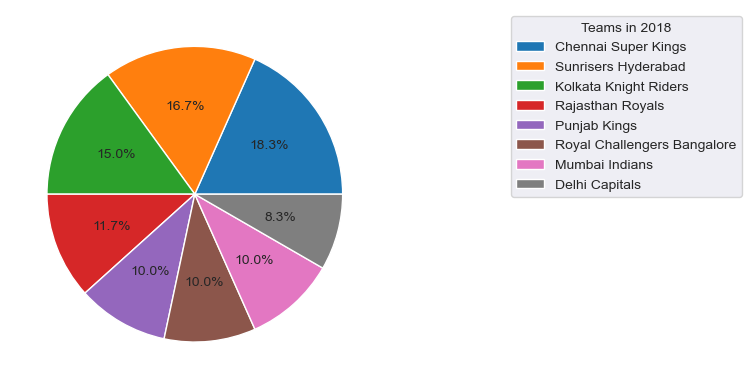

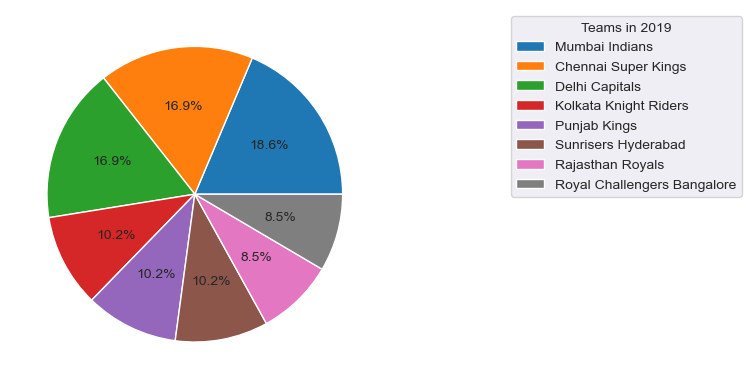

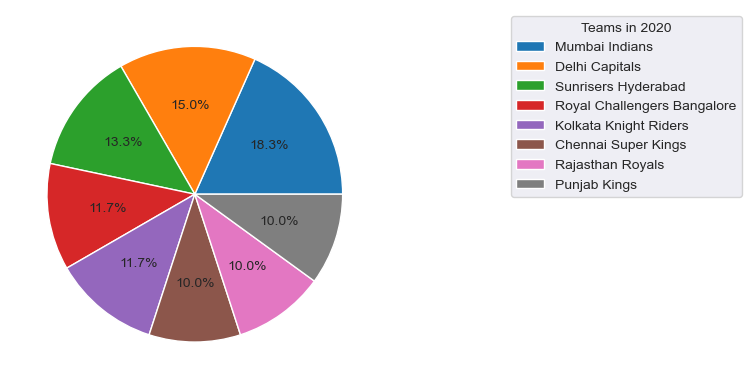

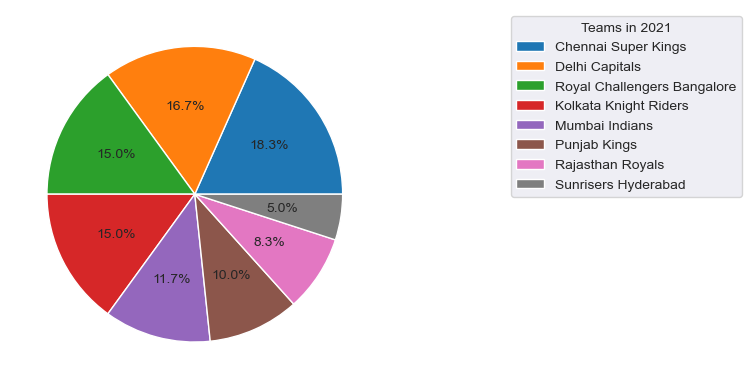

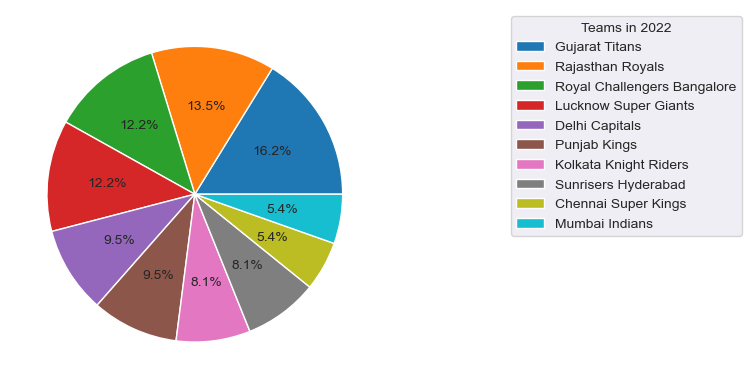

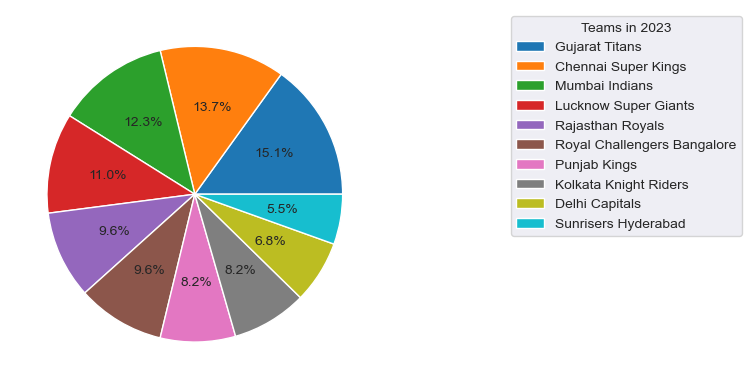

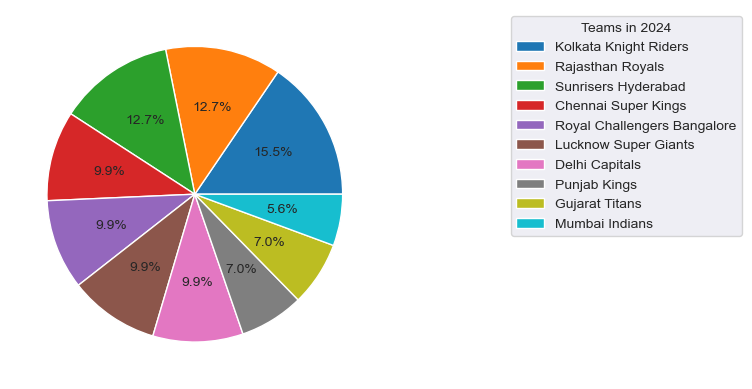

In [43]:
for i in df['year'].unique():
    temp = df[df['year'] == i]['winner_x']
    xdf = df[df.year == i]  # conditioning over the year
    plt.pie(xdf.winner_x.value_counts(), autopct="%1.1f%%")
    plt.legend(xdf.winner_x.value_counts().index, bbox_to_anchor=(2, 1), loc='upper right', title='Teams in {}'.format(i))
    plt.show()
   

    

In [44]:
df['winner_x'].value_counts()

winner_x
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    123
Sunrisers Hyderabad            117
Delhi Capitals                 115
Rajasthan Royals               112
Punjab Kings                   112
Gujarat Titans                  28
Lucknow Super Giants            24
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

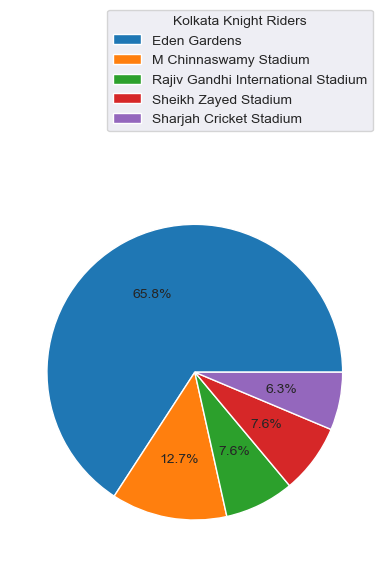

**************************************************


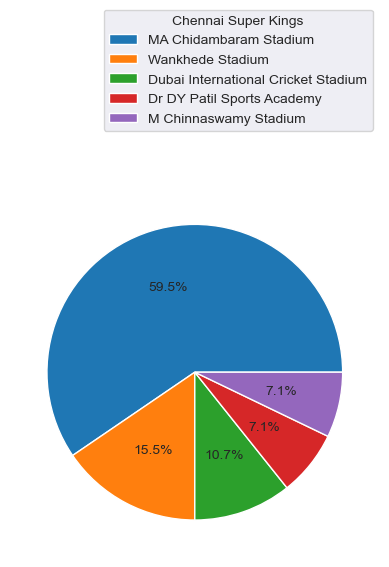

**************************************************


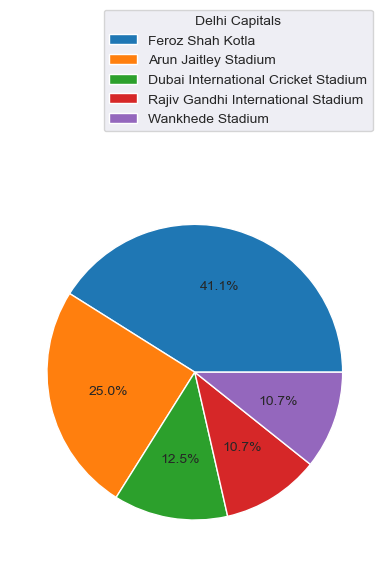

**************************************************


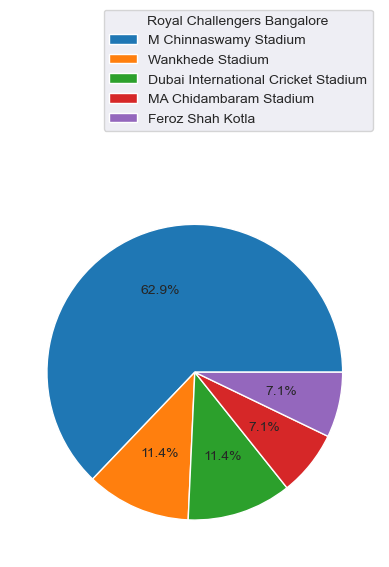

**************************************************


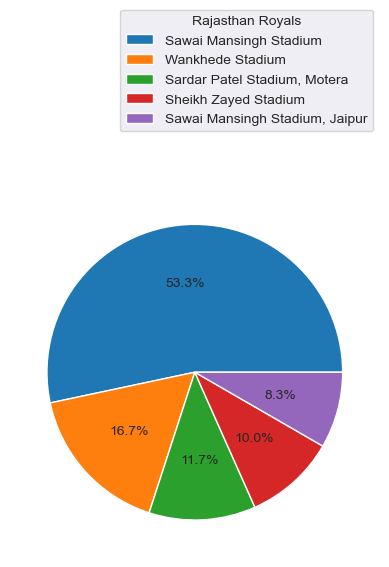

**************************************************


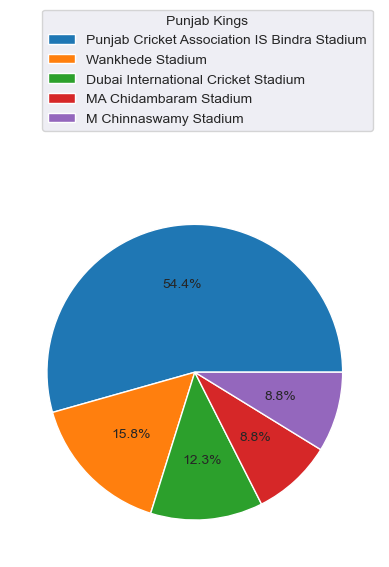

**************************************************


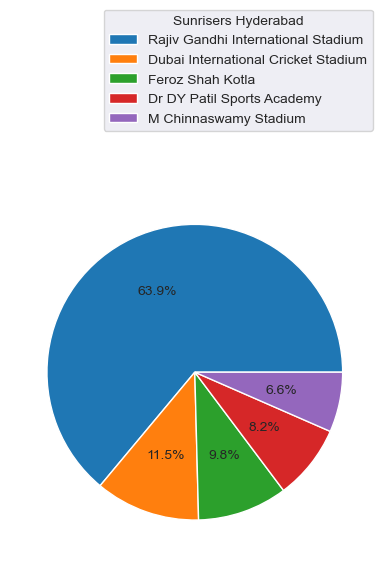

**************************************************


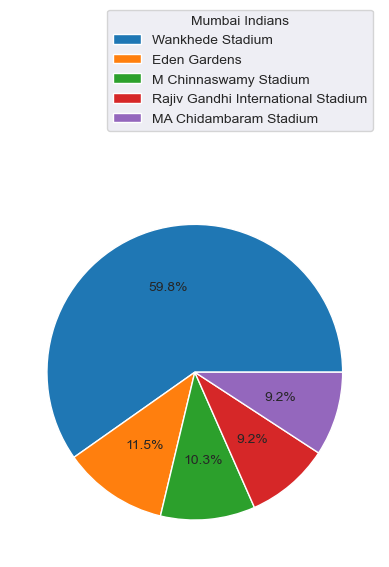

**************************************************


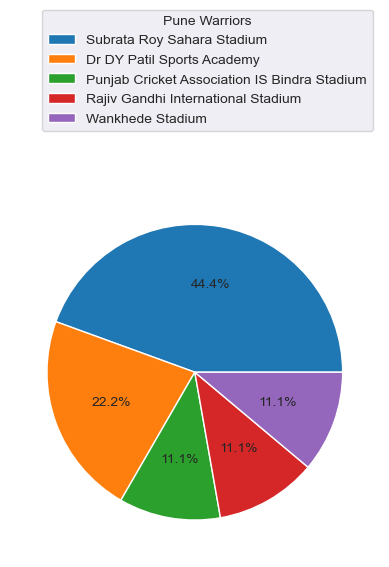

**************************************************


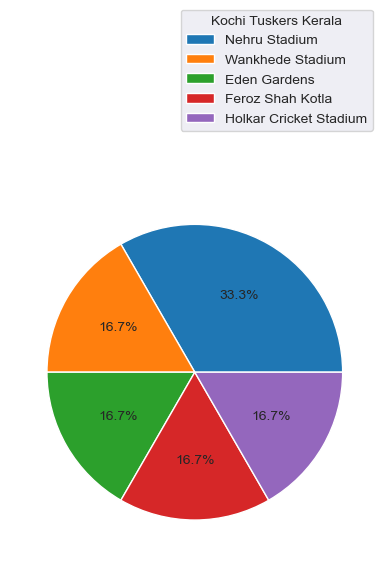

**************************************************


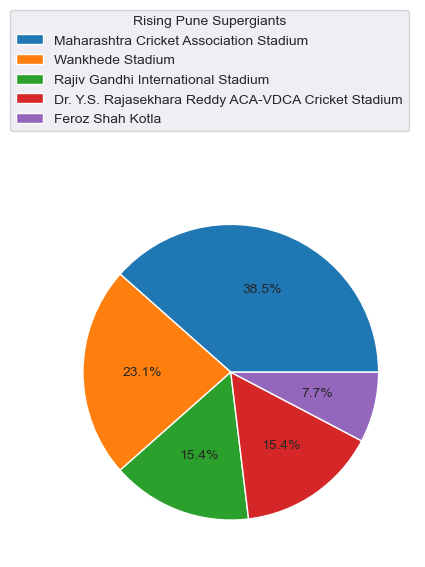

**************************************************


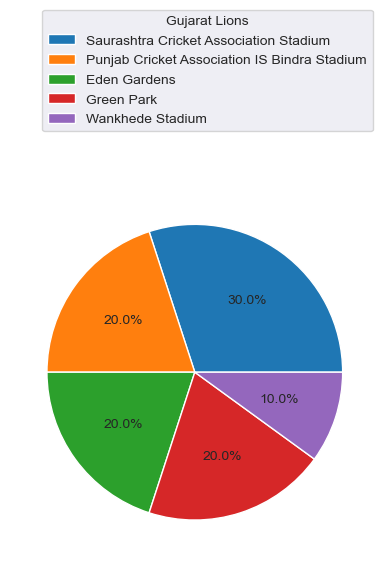

**************************************************


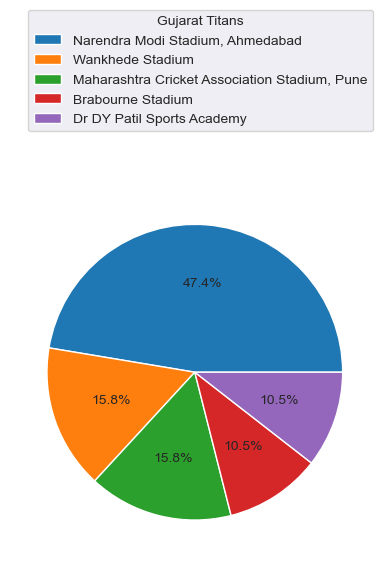

**************************************************


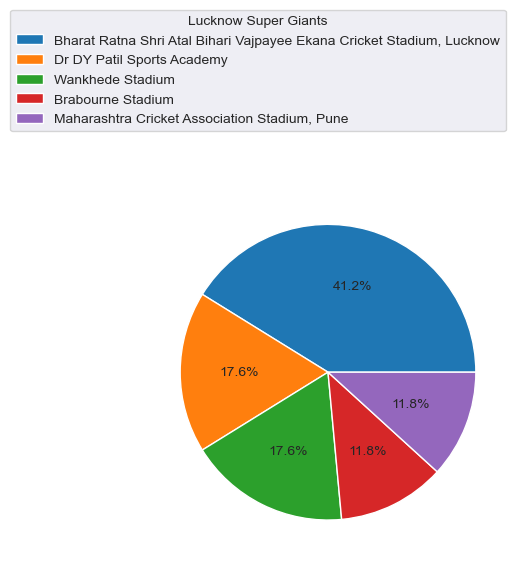

**************************************************


In [57]:
for i in df['winner_x'].unique():
    plt.pie(df[df['winner_x'] == i]['venue_x'].value_counts().head(5), autopct="%1.1f%%" )
    plt.legend(df[df['winner_x'] == i]['venue_x'].value_counts().head(5).index, title = i, bbox_to_anchor=(1,1.5),loc='upper right')
    plt.show()
    print("*" * 50)

<Axes: xlabel='batter'>

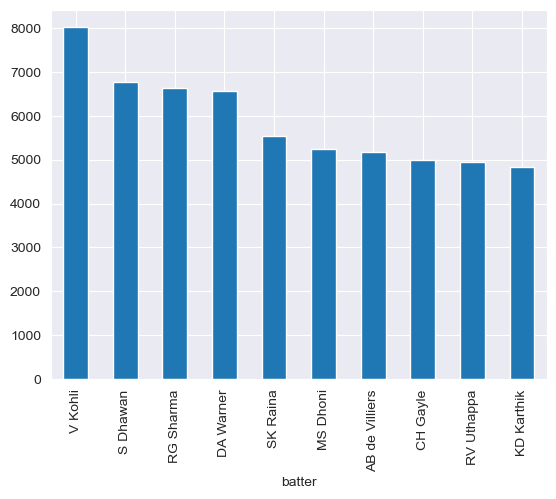

In [64]:
# Top 10 Runs Scorer In Ipl
data1.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='bowler'>

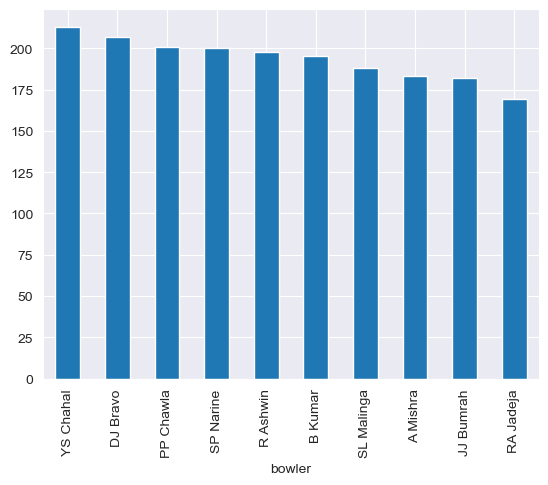

In [66]:
# Top 10 Wickets Taker In Ipl
data1.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:

new_df = pd.merge(data, data1, left_on='id', right_on='match_id', how='inner')
new_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [80]:
new_df.drop(columns=['umpire1', 'umpire2'], inplace=True)

In [84]:
new_df['year'] = pd.DatetimeIndex(new_df.date).year

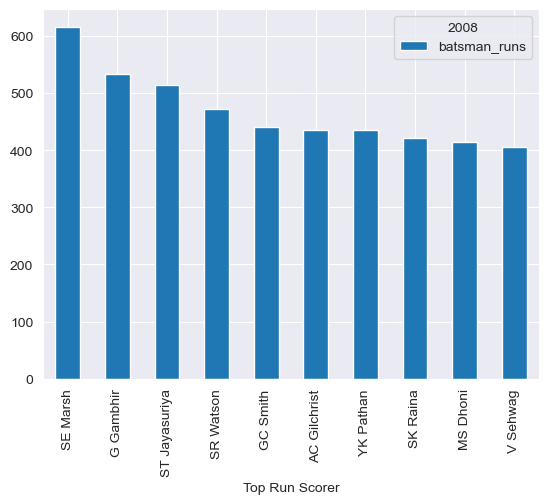

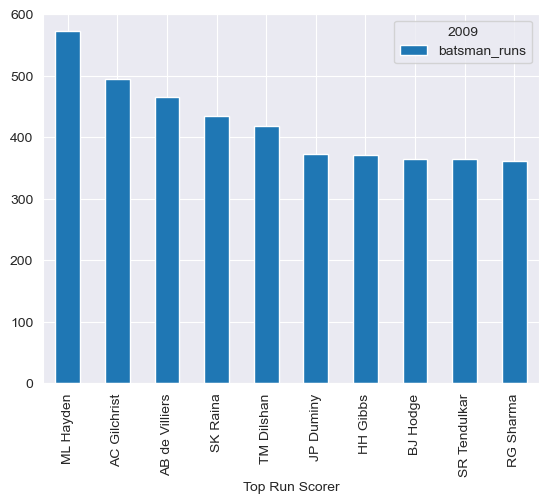

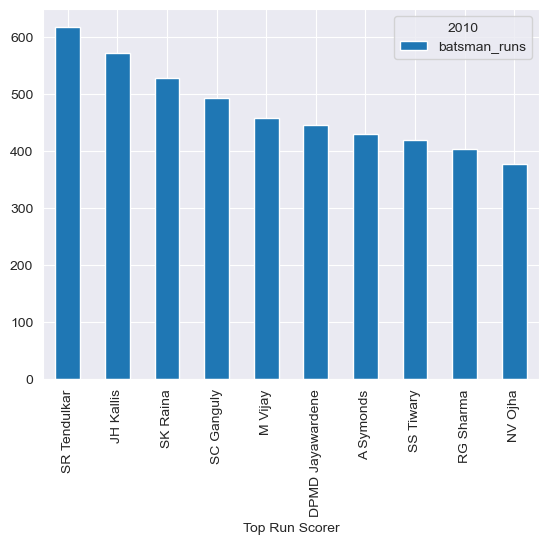

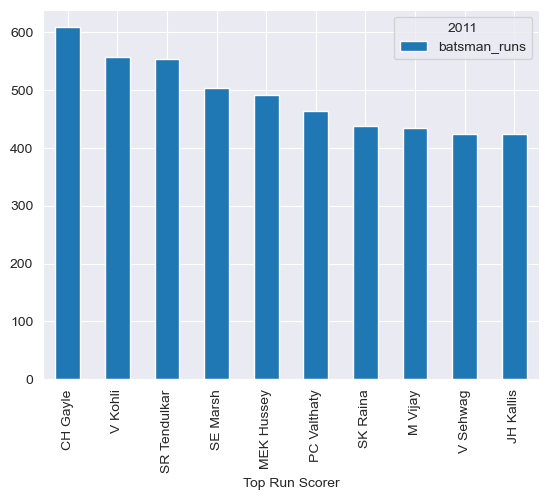

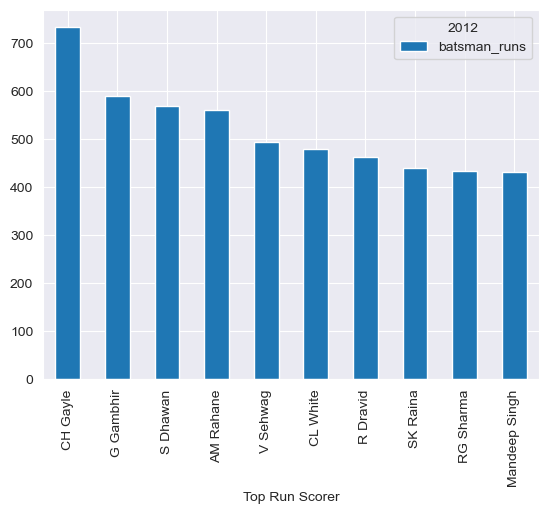

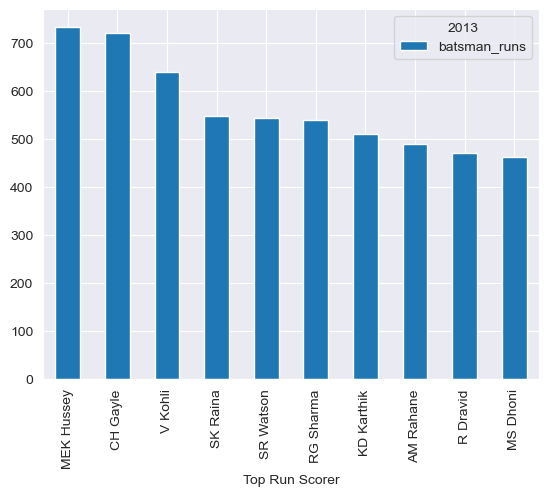

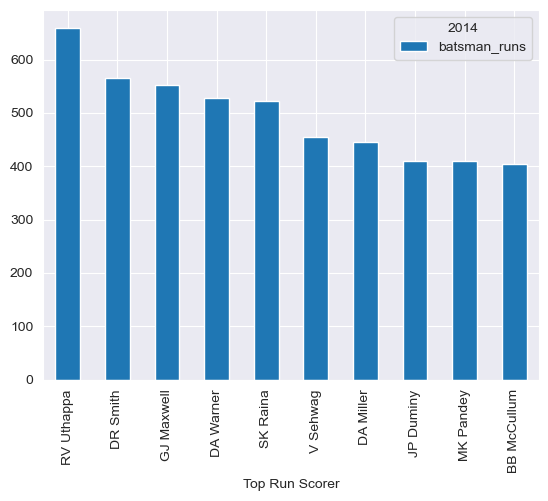

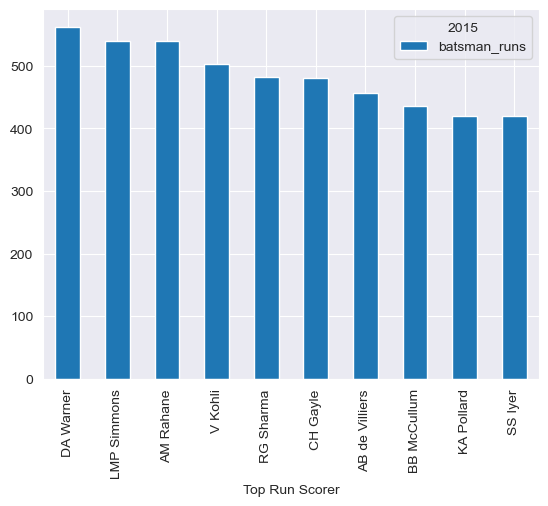

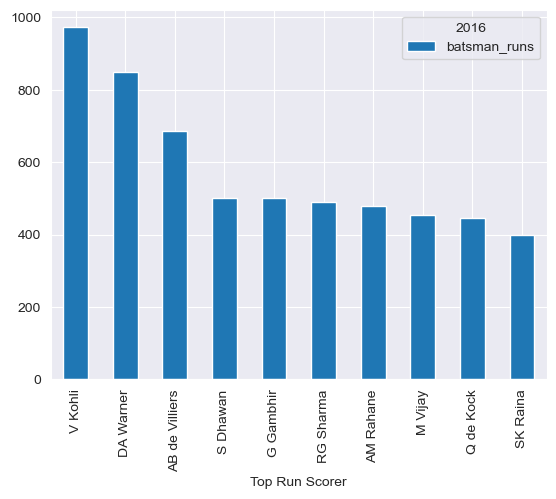

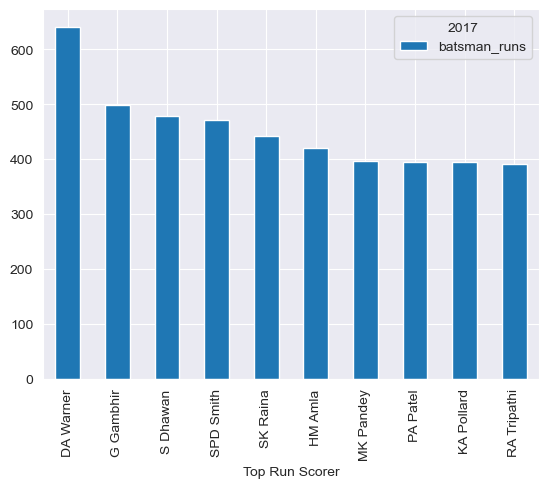

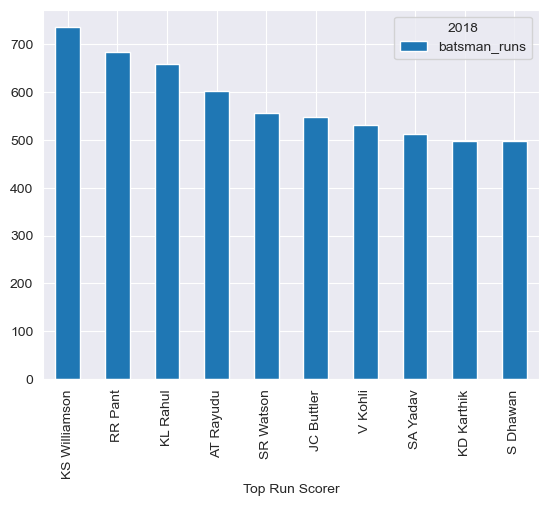

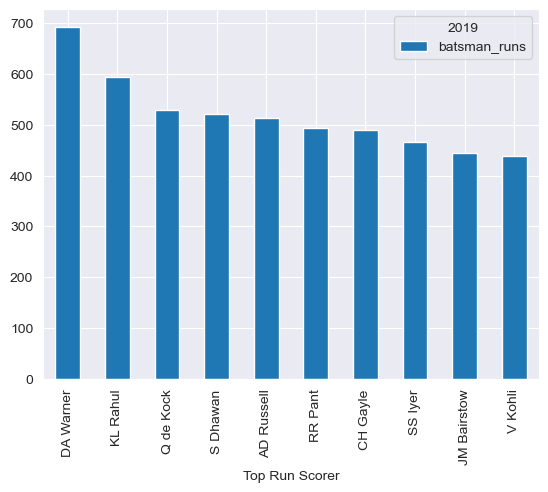

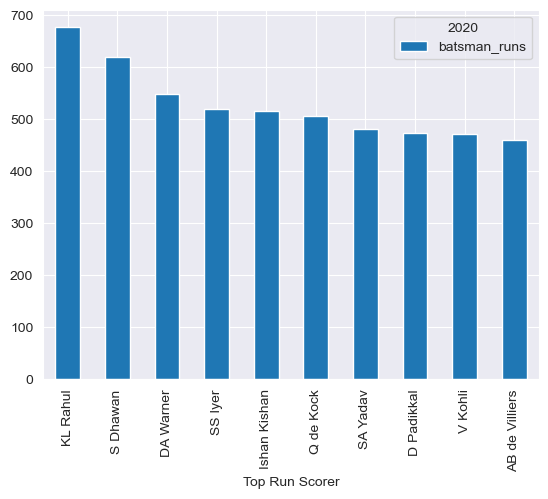

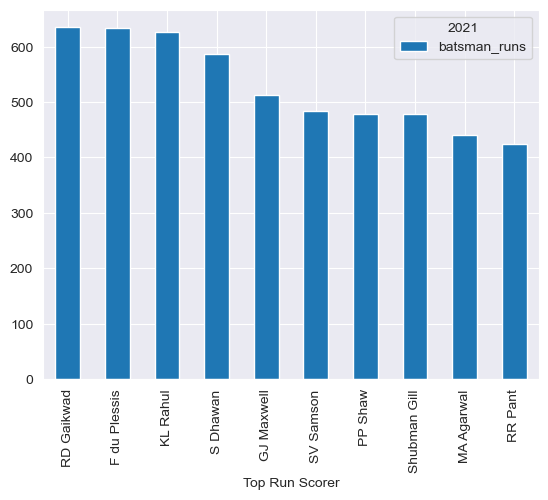

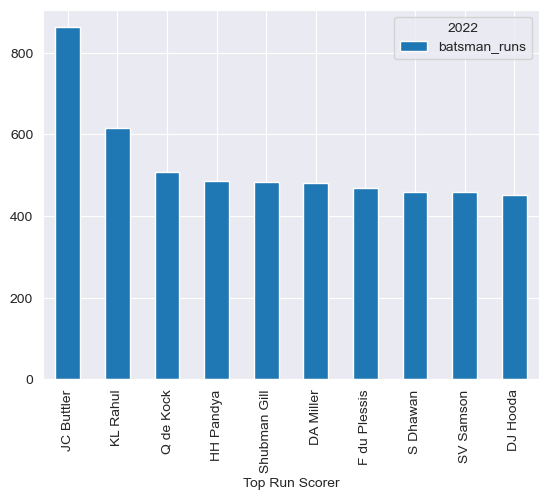

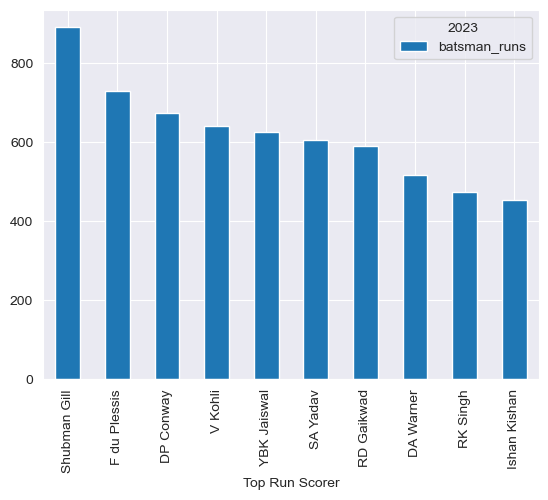

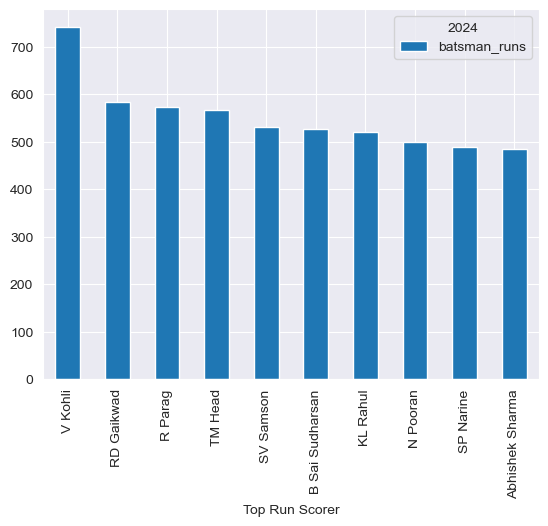

In [ ]:
# Higest Run Scorer in each season
for i in new_df['year'].unique():
    temp = new_df[new_df['year'] == i]
    temp.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
    plt.legend(title = i,)
    plt.xlabel('Top Run Scorer')
    plt.show()

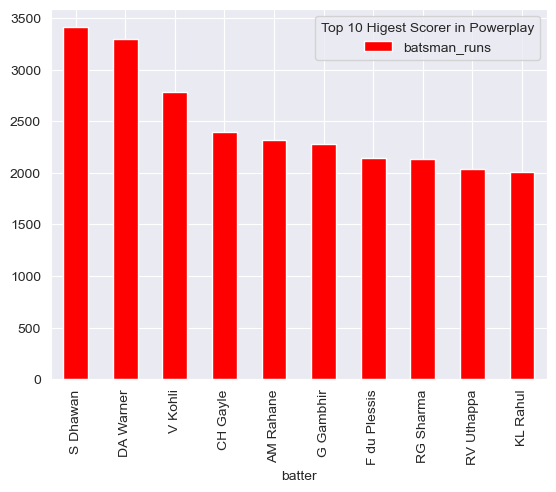

In [100]:
# Top 10 Higest Scorer in PowerPlay
temp = new_df[new_df['over'] < 6]
temp.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='red')
plt.legend(title = "Top 10 Higest Scorer in Powerplay")
plt.show()

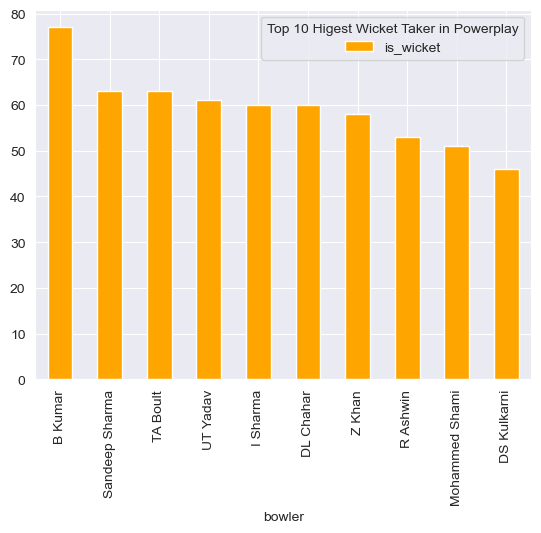

In [102]:
new_df.columns
temp = new_df[new_df['over'] < 6]
temp.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='orange')
plt.legend(title = "Top 10 Higest Wicket Taker in Powerplay")
plt.show()

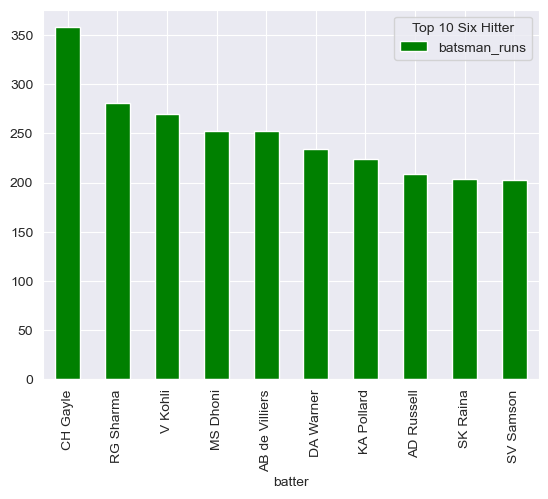

In [110]:
temp = new_df[new_df['batsman_runs'] == 6]
temp.groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='bar',color = 'green')
plt.legend(title = "Top 10 Six Hitter")



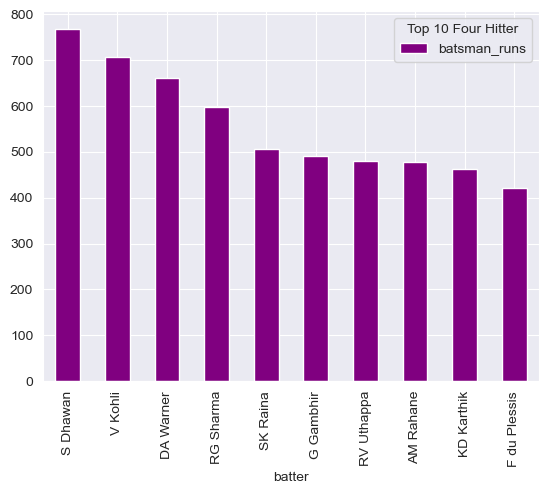

In [112]:
temp = new_df[new_df['batsman_runs'] == 4]
temp.groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='bar',color = 'Purple')
plt.legend(title = "Top 10 Four Hitter")